# Chicago Crimes EDA Spatio/Temporal


In [155]:
#https://www.kaggle.com/skeftical/chicago-crimes-eda-spatio-temporal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [156]:
data = pd.read_csv("crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv")

In [138]:
data.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [157]:
data.drop(labels=['Case Number','ID', 'Block', 'Ward', 'FBI Code', 'Year', 'Updated On',
                 'Beat'] , inplace=True, axis=1)



In [140]:
data.head(5)

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,3,05/03/2016 11:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,1154907.0,1893681.0,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,05/03/2016 09:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,1183066.0,1864330.0,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,05/03/2016 11:31:00 PM,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,1140789.0,1904819.0,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,05/03/2016 10:10:00 PM,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,25.0,1143223.0,1901475.0,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,05/03/2016 10:00:00 PM,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,25.0,1139890.0,1901675.0,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [158]:
# convert dates to pandas datetime format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
data.index = pd.DatetimeIndex(data.Date)

In [142]:
data.head(5)

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,2016-05-03 23:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,1154907.0,1893681.0,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,2016-05-03 21:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,1183066.0,1864330.0,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,1140789.0,1904819.0,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,2016-05-03 22:10:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,25.0,1143223.0,1901475.0,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,2016-05-03 22:00:00,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,25.0,1139890.0,1901675.0,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [159]:
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
#data.dropna()

In [160]:
data = data[np.isfinite(data['X Coordinate'])]
data = data[np.isfinite(data['Y Coordinate'])]


In [161]:
data=data[data['Primary Type']=='BATTERY']

In [154]:
data.groupby('Primary Type').size().sort_values(ascending=False)

Series([], dtype: int64)

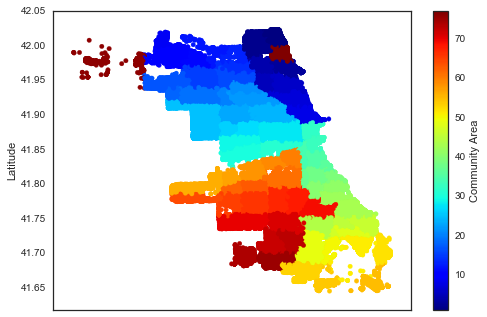

In [162]:
data.plot(kind='scatter',x='Longitude', y='Latitude', c='Community Area', cmap=plt.get_cmap('jet'))

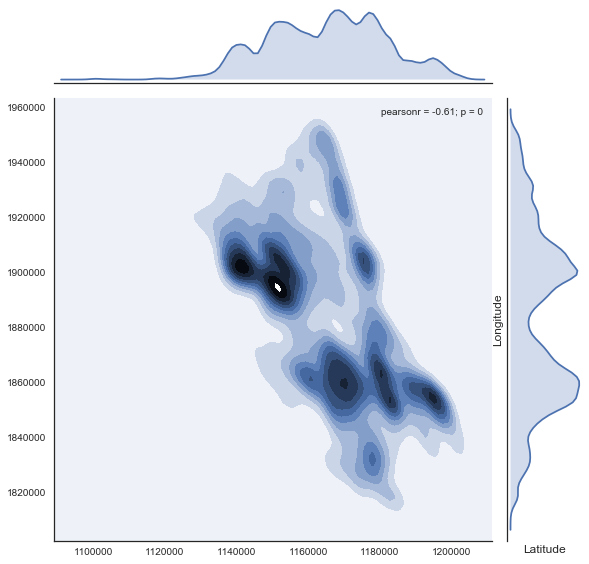

In [164]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data['X Coordinate'].values, y=data['Y Coordinate'].values, size=8, kind='kde')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

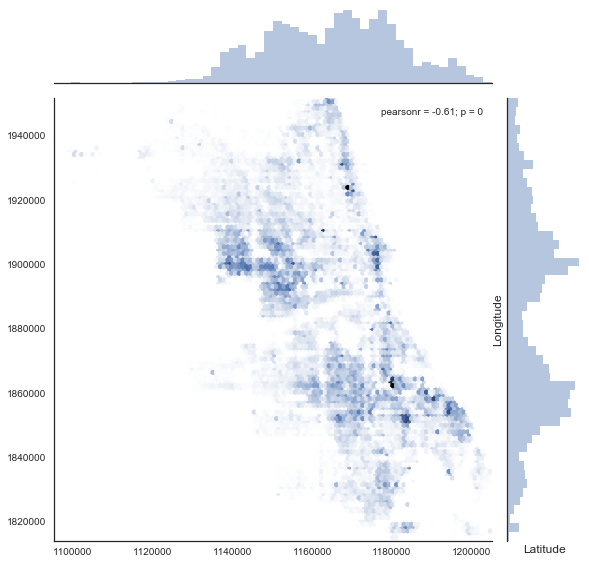

In [165]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data['X Coordinate'].values, y=data['Y Coordinate'].values, size=8, kind='hex')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

KeyboardInterrupt: 

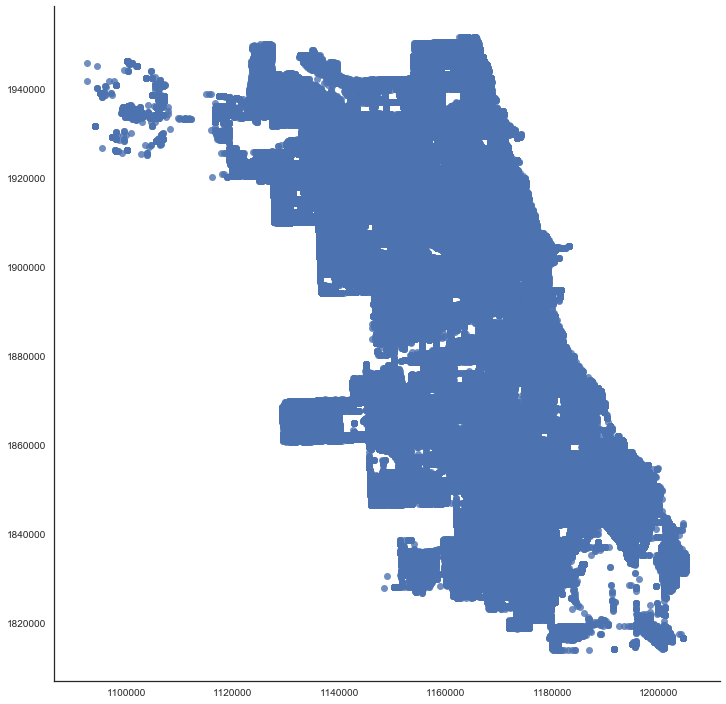

In [29]:
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Arrest', data=data, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()



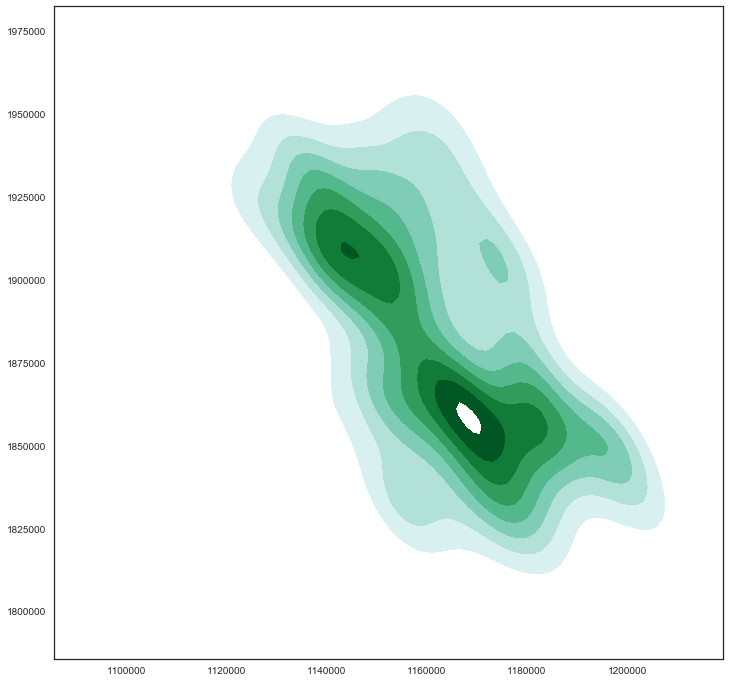

In [134]:
plt.figure(figsize=(12,12))
sns.kdeplot(data['X Coordinate'].values,data['Y Coordinate'].values,shade=True, shade_lowest=False)